In [ ]:
pip install smopy

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import os
import ssl
import json
import smopy

# Plot data-points with matplotlib

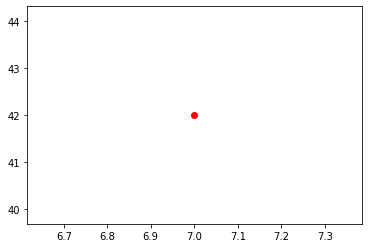

In [4]:
# Plot single point
# 1st, create a figure
fig = plt.figure()
# then create an 'ax' in this figure
ax = fig.add_subplot(111)
# plot red point at x=7, y=42
plt.plot(7, 42, 'ro')

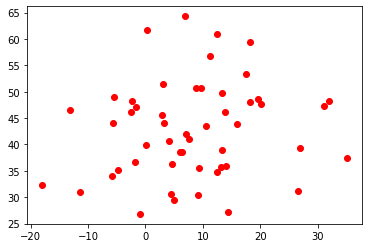

In [5]:
# Plot multiple points
# create a center
center = (7, 42)
# sample scaled normal distribution
datapoints = 10 * np.random.randn(50, 50)
# re-center data
datapoints[0, :] += center[0]
datapoints[1, :] += center[1]
# plot red point for every data-point
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(center[0], center[1], c='red')
ax1.scatter(datapoints[0, :], datapoints[1, :], c='red')

Text(0.5, 1.0, 'useless point clouds')

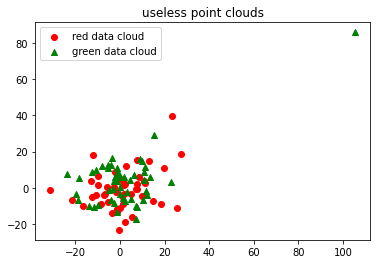

In [6]:
# Use colors, legend and title

# Data-cloud1
# -----------
# create a center
center1 = (7, 42)
# sample scaled normal distribution
datacloud1 = 10 * np.random.randn(50, 50)
# re-center data
datacloud1[0, :] += center1[0]
datacloud1[1, :] += center1[1]

# Data-cloud2
# -----------
# create a center
center2 = (18, 92)
# sample scaled normal distribution
datacloud2 = 10 * np.random.randn(50, 50)
# re-center data
datacloud2[0, :] += center2[0]
datacloud2[1, :] += center2[1]

# plot data cloud1 with red points
# plot data cloud2 with green triangles
# data cloud1 is called "red data cloud"
# data cloud2 is called "green data cloud"
# title of the plot should be "useless point clouds"

p1 = plt.scatter(datacloud1[:,0], datacloud1[:,1], c="red", label="red data cloud")
p2 = plt.scatter(datacloud2[:,0], datacloud2[:,1], c="green", marker="^", label="green data cloud")
plt.legend(handles=[p1, p2], loc='upper left')
plt.title("useless point clouds")

# Plot curves with matplotlib

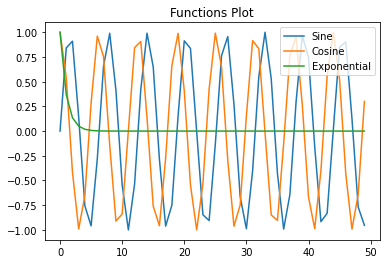

In [7]:
# Some functions
curve1 = np.sin(np.arange(50))
curve2 = np.cos(np.arange(50))
curve3 = np.exp(-np.arange(50))
# plot functions
# colors, labels, title, legends...
plot1, = plt.plot(curve1, label="Sine")
plot2, = plt.plot(curve2, label="Cosine")
plot3, = plt.plot(curve3, label="Exponential")
plt.legend(handles=[plot1, plot2, plot3])
plt.title("Functions Plot")
plt.show()

## Let's use some real data

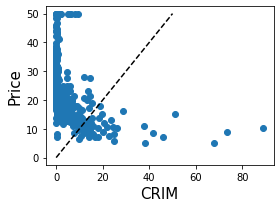

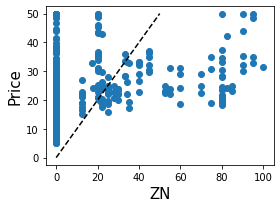

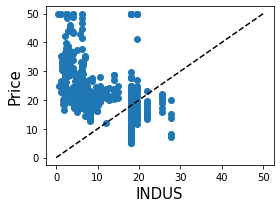

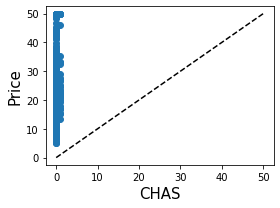

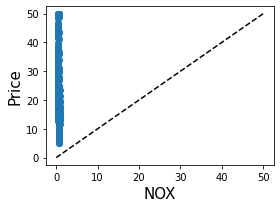

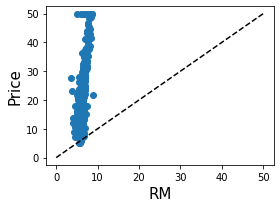

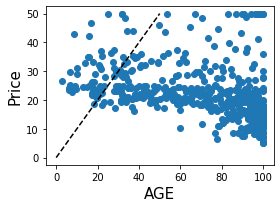

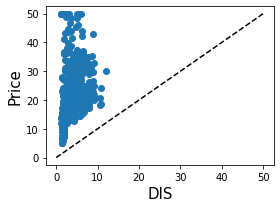

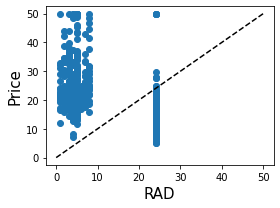

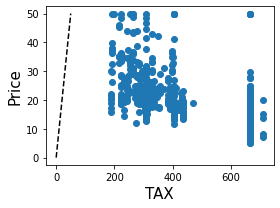

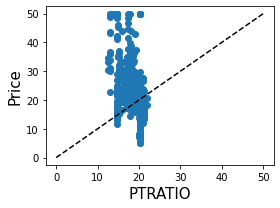

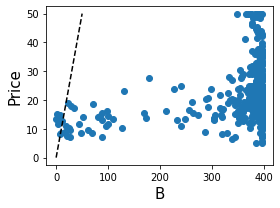

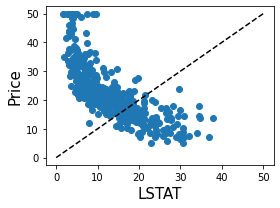

In [8]:
boston = datasets.load_boston()
# check the following attributes of boston:
# - boston.target (prices)
# - boston.feature_names (name of descriptor's components)
# - boston.data (values of each feature for each house in the dataset)
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

# Plot a curve price = f(feature) for every feature in the dataset
# titles and named axes plz
# You might need np.argsort at some point...
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston.data[:, index], boston.target)
    plt.plot([0, 50], [0, 50], '--k')
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

# Read data from files with pandas and plot with seaborn

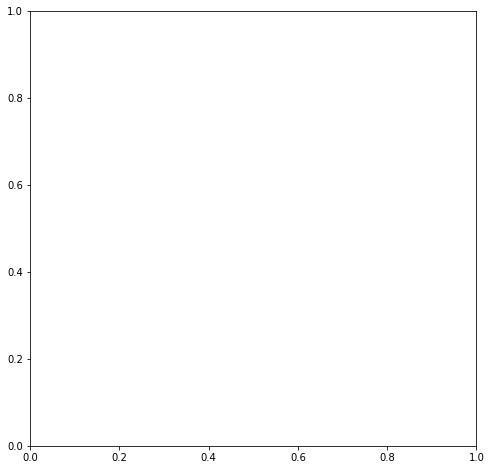

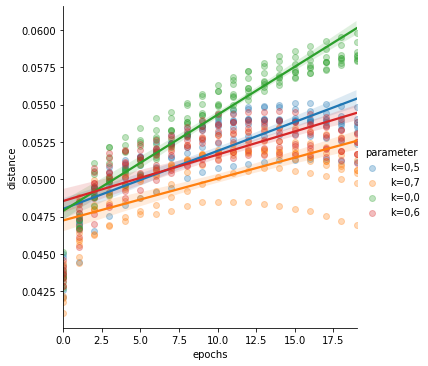

In [9]:
# read csv file with pandas
# csv file: euclidean_training.csv
data = pd.read_csv("https://waterponey.github.io/BigDataClass/files/euclidean_training.csv")
# print the resulting dataframe
data
# create the matplotlib object
fig, ax = plt.subplots(figsize=(8, 8))
# plot with sns

import seaborn as sns
sns.lmplot(
    data=data, 
    x="epochs",
    y="distance",
    hue="parameter",
    scatter_kws={'alpha':0.3}
)
# plot distance = f(epochs)
# one color = one value of parameter k
# for every value of k, multiple experiments were run 
# (i.e. multiple curves distance=f(epochs) exist)
# seaborn plots the average with transparency for dispersion

# Plot geographical data

In [10]:
# The following might be unnecessary (or even produce an error...)
# comment if necessary
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
      ssl._create_default_https_context = ssl._create_unverified_context

In [11]:
# Here is a convenient object to create maps (geographical).
class Map(object):
    def __init__(self, latmin, latmax, longmin, longmax, zoom):
        self.latmin = latmin
        self.latmax = latmax
        self.longmin = longmin
        self.longmax = longmax
        self.zoom = zoom
        self.smopymap = smopy.Map((latmin, latmax, longmin, longmax), z=zoom)
    
    def get_image(self):
        return np.array(self.smopymap.img)
    
    def to_image_pixels(self, lat, long):
        return [int(k) for k in self.smopymap.to_pixels(lat, long)]


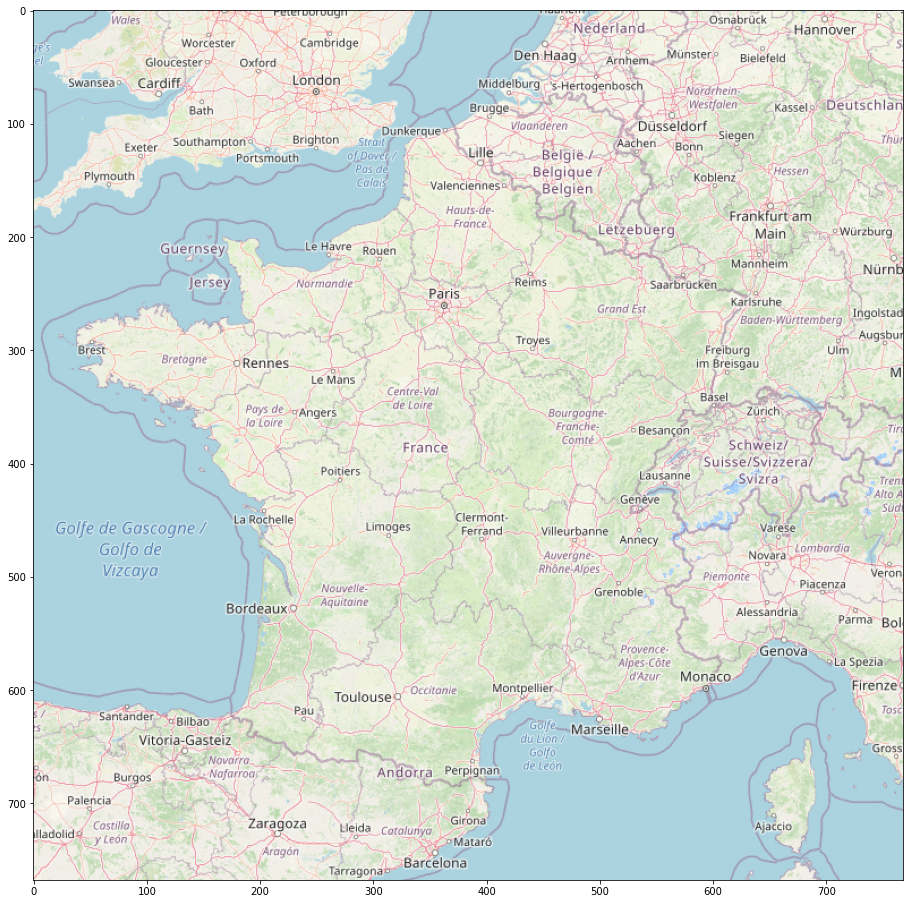

In [12]:
# plot an image with matplotlib
my_map = Map(45., -1., 48.9, 5.5, 6)
image = my_map.get_image()
# create figure
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax
ax.imshow(image)

(768, 768, 3)
362 260


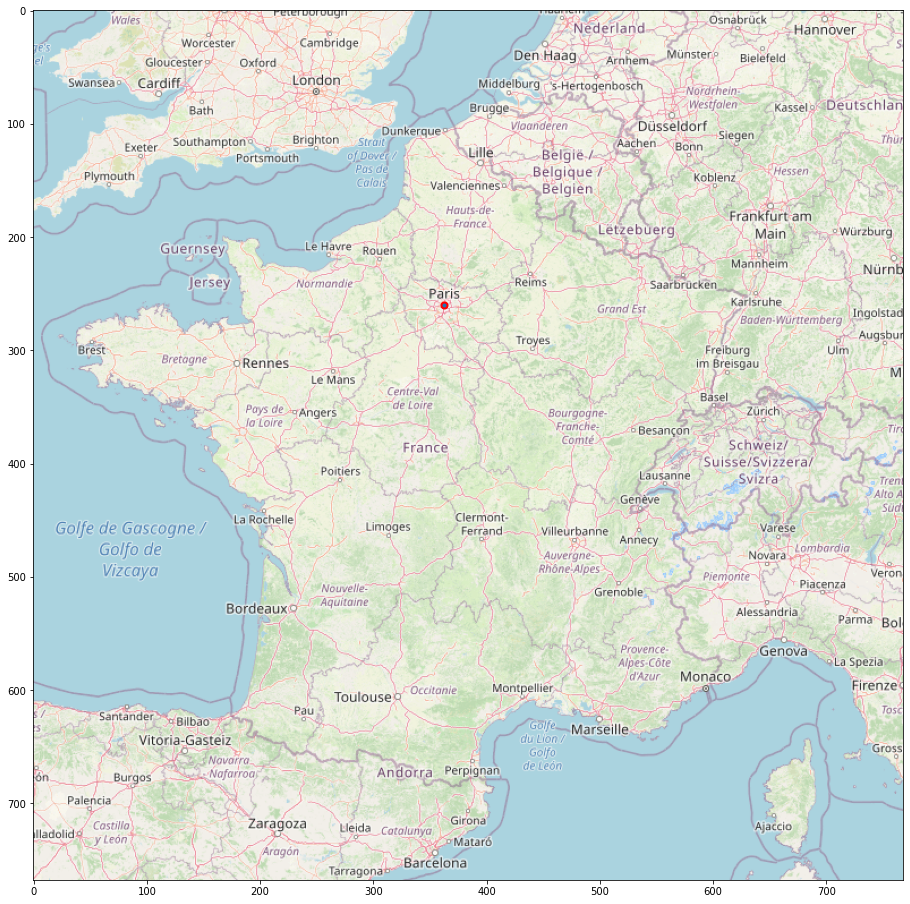

In [13]:
# show image structure
print(image.shape)
# change color of a pixel in the image
Paris_latitude = 48.86151
Paris_longitude = 2.33474
x, y = my_map.to_image_pixels(Paris_latitude, Paris_longitude)
print(x, y)
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax with a red circle placed on Paris
ax.imshow(image)
ax.scatter(x, y, edgecolors="red", linewidths=2, zorder=2)

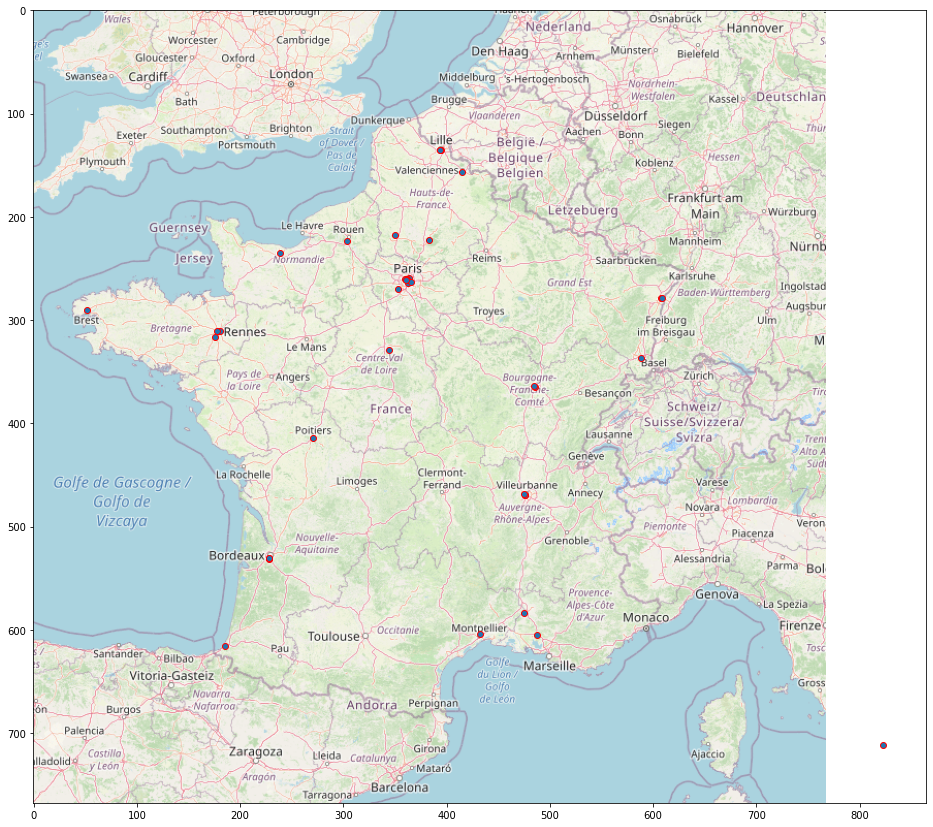

In [14]:
import json
# load a json file
# file is: fr-esr-principaux-etablissements-enseignement-superieur.json
with open("/Users/Sunny/Desktop/TSE2/M2 EcoStat/Big Data/data/fr-esr-principaux-etablissements-enseignement-superieur.json", "r") as f:
    data = json.load(f)

fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax
ax.imshow(image)

points = []
coords = {"x":[], "y":[]}

for i in range(0, len(data)):
    points.append((data[i]['geometry']['coordinates'][1], 
                   data[i]['geometry']['coordinates'][0]))

    
lat = [x[0] for x in points]
long = [x[1] for x in points]


for i in range(0, len(lat)):
    coords["x"].append(my_map.to_image_pixels(lat[i], long[i])[0])
    coords["y"].append(my_map.to_image_pixels(lat[i], long[i])[1])

# plot schools with circles
# set a different color/shape for 'artistique', 'ingenieur' and 'commerce' labels
ax.imshow(image)
#just plot first 40 points for map to render
coords["x"] = coords["x"][:40]
coords["y"] = coords["y"][:40]
ax.scatter(coords["x"], coords["y"], edgecolors="red", linewidths=1)


# Charts

array([<AxesSubplot:ylabel='None'>], dtype=object)

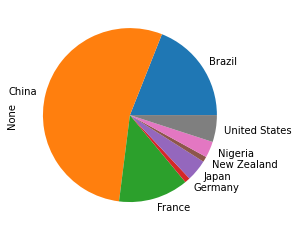

In [15]:
# Load csv: users.csv
# plot a pie chart of nationality of the users
users = pd.read_csv("/Users/Sunny/Desktop/TSE2/M2 EcoStat/Big Data/data/users.csv")
users_country = users.groupby('country').size()
users_country.plot.pie(subplots=True)

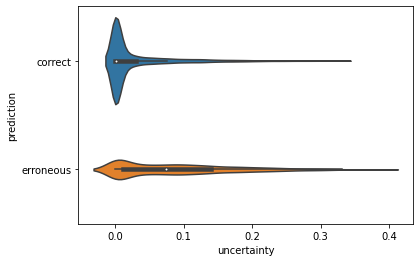

In [16]:
# Load uncertainty.csv
# create violin plots with seaborn
# 'erroneous' next to 'correct' densities
uncertainty = pd.read_csv("/Users/Sunny/Desktop/TSE2/M2 EcoStat/Big Data/data/uncertainty.csv")
uncertainty
ax = sns.violinplot(x="uncertainty", y="prediction", data=uncertainty)